Se importa el Dataset a utilizar, en este caso es "Ventas 2020-2022"

In [47]:
import pandas as pd
df= pd.read_csv('/content/drive/MyDrive/Archivos DataScience/ventas2020-2022.csv',sep=';', on_bad_lines='skip')
df

,PRODUCTO,OPERACIÓN,CODIGO TOMADOR,NOMBRE TOMADOR,CODIGO DE PRODUCTOR,FECHA DE EMISION,FECHA INICIO VIGENCIA,FECHA FIN VIG,DURACION DE POLIZA,PRODUCTO ANTERIOR,...,MEDIO DE PAGO,PREMIO,CANTIDAD DE ASEGURADOS,TIPO DE PERSONA,FECHA NACIMIENTO,SEXO,TIPO DOC,NRO DOC,DOMICILIO,TELEFONO
0,1,17,41,SMSV INSTITUCION MUTUALISTA | 2030527516737,1,30/6/2020,1/7/2020,30/6/2021,12,1,...,8,3.882343e+07,1,J,1000-01-01,1,20.0,3.052752e+10,AV CORDOBA 1674 0 - (1055) CAPITAL FEDERAL - ...,1141294000
1,1,18,41,SMSV INSTITUCION MUTUALISTA | 2030527516737,1,30/6/2021,1/7/2021,30/6/2022,12,1,...,8,7.091261e+07,1,J,1000-01-01,1,20.0,3.052752e+10,AV CORDOBA 1674 0 - (1055) CAPITAL FEDERAL - ...,1141294000
2,1,19,41,SMSV INSTITUCION MUTUALISTA | 2030527516737,1,30/6/2022,1/7/2022,30/6/2023,12,1,...,8,7.488463e+07,1,J,1000-01-01,1,20.0,3.052752e+10,AV CORDOBA 1674 0 - (1055) CAPITAL FEDERAL - ...,1141294000
3,2,15,41,SMSV INSTITUCION MUTUALISTA | 2030527516737,1,30/6/2020,1/7/2020,30/6/2021,12,2,...,8,1.292710e+08,1,J,1000-01-01,1,20.0,3.052752e+10,AV CORDOBA 1674 0 - (1055) CAPITAL FEDERAL - ...,1141294000
4,2,16,41,SMSV INSTITUCION MUTUALISTA | 2030527516737,1,30/6/2021,1/7/2021,30/6/2022,12,2,...,8,2.778147e+08,1,J,1000-01-01,1,20.0,3.052752e+10,AV CORDOBA 1674 0 - (1055) CAPITAL FEDERAL - ...,1141294000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89139,304,21,236152,MARIPILLAN HUMBERTO | 424017722,354,24/7/2022,25/7/2022,24/7/2023,12,0,...,5,6.224340e+03,1,F,9/2/1975,1,21.0,2.024018e+10,SECCION QUINTAS S/N 0 - (6360) BARRIO EL MOL...,2977401653
89140,304,24,214399,JEREZ JUAN JOSE | 0427995460,350,13/9/2022,14/9/2022,13/9/2023,12,0,...,5,6.666430e+03,1,F,12/8/1980,1,4.0,2.799546e+07,CIUDAD DE NIEVA SUIPACHA 696 - (4600) - JUY...,3516114696
89141,304,33,307443,NIEVA ANTONIO RAFAEL | 2120307686970,350,28/9/2022,29/9/2022,28/9/2023,12,0,...,5,6.477360e+03,1,F,11/7/1984,1,21.0,2.030769e+10,BARRIO MILITAR ANEXO CASA 30 - (4600) SAN SA...,3875748168
89142,304,35,139212,DOMINGUEZ NELSON RAFAEL | 0427727276,354,17/11/2022,18/11/2022,17/11/2023,12,0,...,5,2.383408e+04,2,F,5/3/1980,1,21.0,2.027727e+10,AV CORDOBA 1674 0 - (4411) SEY - JUY - ARG,3884208847


En el grafico a continuacion, utilizando la librería Matplotlib, intento analizar la evolucion de la cantidad de  ventas por mes a lo largo de los meses de los tres años analizados. 
Podemos observar que siempre en los meses de abril y septiembre se produce un incremento en las ventas, teniendo su pico máximo en abril de 2022

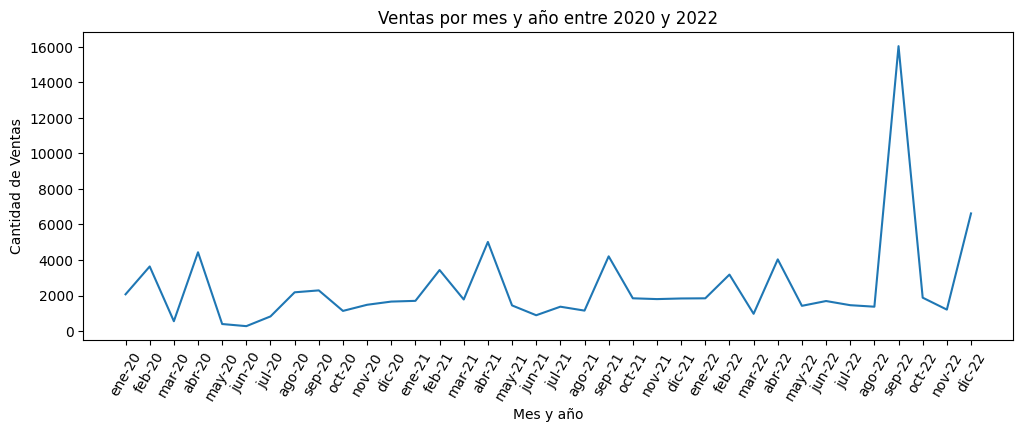

In [78]:
import numpy as np
import matplotlib.pyplot as plt
df['FECHA DE EMISION'] = pd.to_datetime(df['FECHA DE EMISION'])
ventas_por_mes = df.groupby([df['FECHA DE EMISION'].dt.year, df['FECHA DE EMISION'].dt.month]).size()
fig, ax = plt.subplots(figsize=(12,4))
x=['ene-20','feb-20','mar-20','abr-20','may-20','jun-20','jul-20','ago-20','sep-20','oct-20','nov-20','dic-20',
'ene-21','feb-21','mar-21','abr-21','may-21','jun-21','jul-21','ago-21','sep-21','oct-21','nov-21','dic-21',
'ene-22','feb-22','mar-22','abr-22','may-22','jun-22','jul-22','ago-22','sep-22','oct-22','nov-22','dic-22']
ax.plot(x, ventas_por_mes, label='Cantidad de Ventas')
ax.set_title('Ventas por mes y año entre 2020 y 2022')
ax.set_ylabel('Cantidad de Ventas')
ax.set_xlabel('Mes y año')
ax.tick_params(axis='x', rotation=60)

En este siguiente caso, utilizamos un grafico de barras de Matplotlib para analizar el importe vendido por año. Si bien los importes van aumentando año a año, no logra ese aumento superar la inflación, por lo que si bien existe un aumento nominal, no hay un aumento real de los importes.

Text(0.5, 0, 'Año')

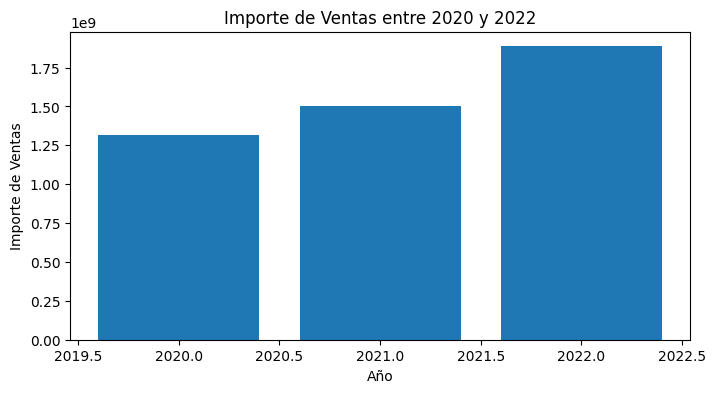

In [80]:
ventas_por_anio = df.groupby(df['FECHA DE EMISION'].dt.year)['PREMIO'].sum()
fig, ax = plt.subplots(figsize=(8,4))
ax.bar(ventas_por_anio.index, ventas_por_anio)
ax.set_title('Importe de Ventas entre 2020 y 2022')
ax.set_ylabel('Importe de Ventas')
ax.set_xlabel('Año')

Para finalizar con Matplotlib, quise mirar la distribucion de ventas entre Empresas (Personas Juridicas o J) y personas Fisicas (F). Es importante verificar que hay una gran diferencia en la cantidad de ventas realizadas a personas físicas respecto a la jurídicas, en cantidad prácticamente son todo el volumen de ventas

Text(0.5, 1.0, 'Porcentaje de Ventas a Personas Fisicas o Juridicas')

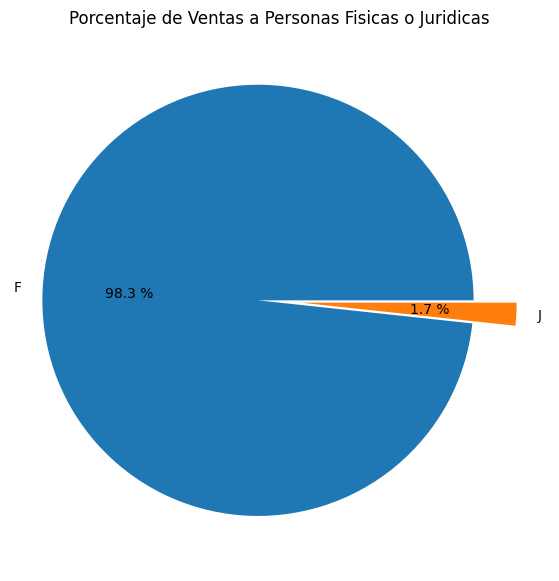

In [85]:
ventas_por_tipoper=df.groupby(df['TIPO DE PERSONA']).size()
fig,ax = plt.subplots(figsize =(10, 7))
desfase = (0.1, 0.1)
ax.pie(ventas_por_tipoper, labels = ventas_por_tipoper.index,autopct="%0.1f %%", explode=desfase)
ax.set_title('Porcentaje de Ventas a Personas Fisicas o Juridicas')

Iniciando con la libreria Seaborn, siguiendo con la division entre empresas y personas físicas, ahora vemos que en la division por ramas del seguro, para las personas fisicas es la rama 24 la más vendida, mientas que para personas juridicas es la rama 24 también

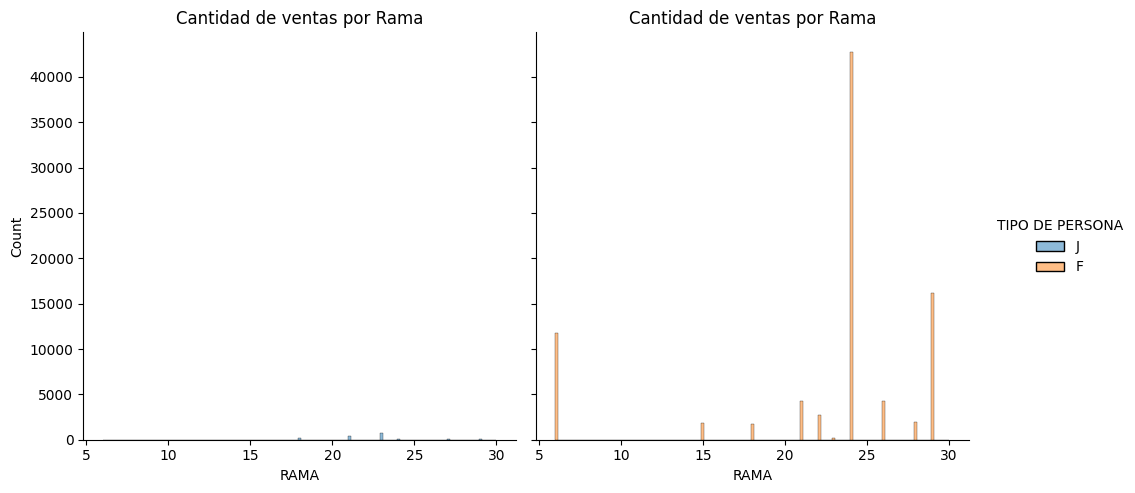

In [122]:
import seaborn as sns
sns.displot(data=df, x="RAMA", hue="TIPO DE PERSONA", col="TIPO DE PERSONA").set (title = 'Cantidad de ventas por Rama')

In [ ]:
df.insert(7,"MES DE EMISION",df['FECHA DE EMISION'].dt.month)

In [105]:
df.insert(8,"AÑO DE EMISION",df['FECHA DE EMISION'].dt.year)

En relacion a los gráficos anteriores, nosotros ya sabemos que en cantidad, las personas físicas son practicamente todo el volumen de la compañia.
Pero en este grafico vemos que, en importes de ventas, o sea en cantidad de dinero que le ingresa a la compañía, son las Empresas las que tienen el mayor volumen.
Esto da la pauta de que la empresa esta basada en pocos negocios de mucho volumen de dinero.
Aperturando por meses, siempre junio y julio son los meses de mayores importes de ingreso a la compañia.

[Text(0.5, 1.0, 'Importe de ventas por Tipo de persona')]

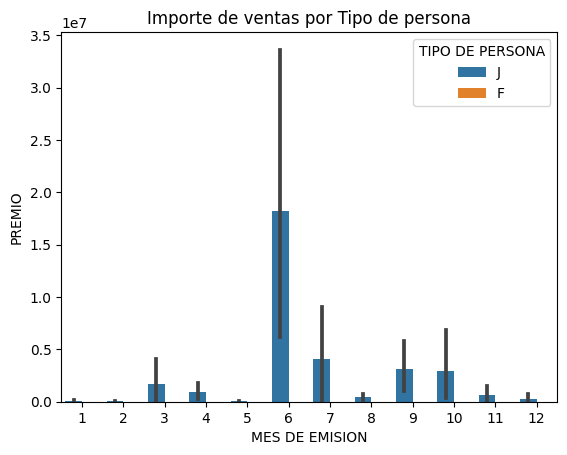

In [124]:
sns.barplot(x="MES DE EMISION", y="PREMIO", hue="TIPO DE PERSONA", data=df).set (title = 'Importe de ventas por Tipo de persona')

Para finalizar, vimos antes que la rama 24 es la que mas cantidad de ventas acumula, pero no es la que más dinero le deja a la compañía.

[Text(0.5, 1.0, 'Importe de ventas por Rama por año')]

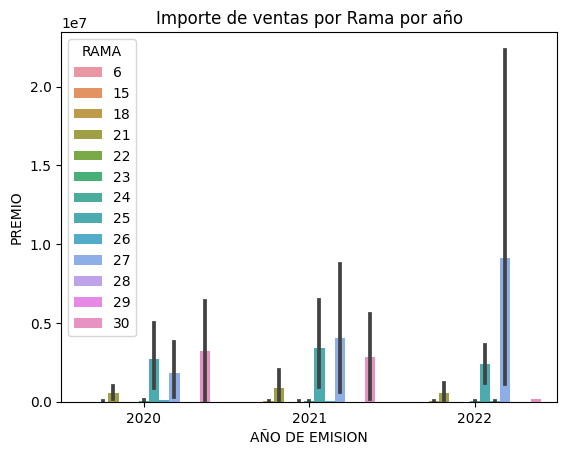

In [131]:
 sns.barplot(x="AÑO DE EMISION", y="PREMIO", hue="RAMA", data=df).set (title = 'Importe de ventas por Rama por año')